In [1]:
# import packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

### Set data path and import raw data

In [2]:
raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
train_file_path = os.path.join(raw_data_path, 'train.csv')
test_file_path = os.path.join(raw_data_path, 'test.csv')

In [3]:
train_df = pd.read_csv(train_file_path, index_col='PassengerId')
test_df = pd.read_csv(test_file_path, index_col='PassengerId')

#### Basic structure of the data

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
 test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass      418 non-null int64
Name        418 non-null object
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Ticket      418 non-null object
Fare        417 non-null float64
Cabin       91 non-null object
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [6]:
# set a default value for survived column
test_df['Survived'] = -1000
combined_df = pd.concat((train_df, test_df), axis=0, sort=True)

In [7]:
combined_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450


In [8]:
combined_df.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,-1000,A.5. 3236
1306,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1,female,0,-1000,PC 17758
1307,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,3,male,0,-1000,SOTON/O.Q. 3101262
1308,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,3,male,0,-1000,359309
1309,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,3,male,1,-1000,2668


In [9]:
# Select row and specific column
combined_df.loc[100:102, ['Name', 'Age', 'Sex']]

,Name,Age,Sex
PassengerId,,,
100,"Kantor, Mr. Sinai",34.0,male
101,"Petranec, Miss. Matilda",28.0,female
102,"Petroff, Mr. Pastcho (""Pentcho"")",NaN,male


In [10]:
# Select row and column range
combined_df.loc[100:102, 'Fare':'Sex']

,Fare,Name,Parch,Pclass,Sex
PassengerId,,,,,
100,26.0000,"Kantor, Mr. Sinai",0,2,male
101,7.8958,"Petranec, Miss. Matilda",0,3,female
102,7.8958,"Petroff, Mr. Pastcho (""Pentcho"")",0,3,male


In [11]:
combined_df.iloc[200:205, 3:8]

,Fare,Name,Parch,Pclass,Sex
PassengerId,,,,,
201,9.5000,"Vande Walle, Mr. Nestor Cyriel",0,3,male
202,69.5500,"Sage, Mr. Frederick",2,3,male
203,6.4958,"Johanson, Mr. Jakob Alfred",0,3,male
204,7.2250,"Youseff, Mr. Gerious",0,3,male
205,8.0500,"Cohen, Mr. Gurshon ""Gus""",0,3,male


#### Summary statistics

In [12]:
combined_df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,-319.066463
std,14.413493,51.758668,0.865560,0.837836,1.041658,466.573561
min,0.170000,0.000000,0.000000,1.000000,0.000000,-1000.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,-1000.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


In [13]:
combined_df.median()

Age         28.0000
Fare        14.4542
Parch        0.0000
Pclass       3.0000
SibSp        0.0000
Survived     0.0000
dtype: float64

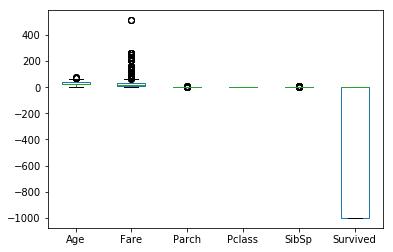

In [14]:
# Box whisker plot for all
combined_df.plot(kind='box');

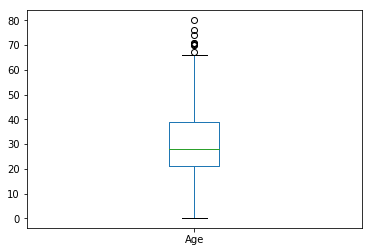

In [15]:
# Box whisker plot for age
combined_df.Age.plot(kind='box');

In [16]:
combined_df.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309,1309.000000,1309.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Connolly, Miss. Kate",NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,2.294882,NaN,0.498854,-319.066463,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,0.837836,NaN,1.041658,466.573561,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,NaN,0.000000,-1000.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,2.000000,NaN,0.000000,-1000.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,3.000000,NaN,1.000000,1.000000,NaN


In [17]:
# counts and categorical data
combined_df.Sex.value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [18]:
# counts and categorical as proportions
combined_df.Sex.value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [19]:
combined_df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [20]:
# counts for survival
combined_df.Survived.value_counts()

 0       549
-1000    418
 1       342
Name: Survived, dtype: int64

In [21]:
# counts for survival without test data
combined_df[combined_df.Survived != -1000].Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

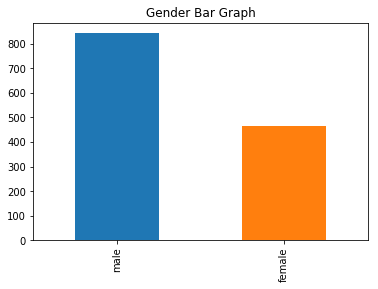

In [22]:
# plat bar graph
combined_df.Sex.value_counts().plot(kind='bar', title='Gender Bar Graph');

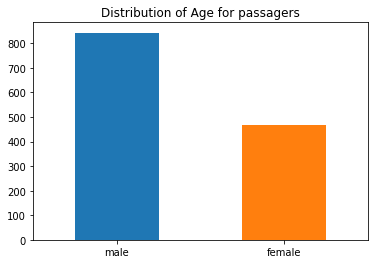

In [23]:
# plat bar graph with a bit of customazition
combined_df.Sex.value_counts().plot(kind='bar', rot=0, title='Distribution of Age for passagers');

### Data distributions
Univariate - use histogram, Kernel Density Estimation(KDE) plot
Bivariate - use scatter plot

#### Histogram

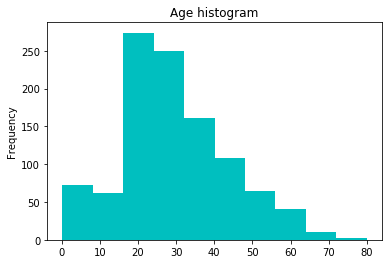

In [24]:
# Age
combined_df.Age.plot(kind='hist', title='Age histogram', color='c');

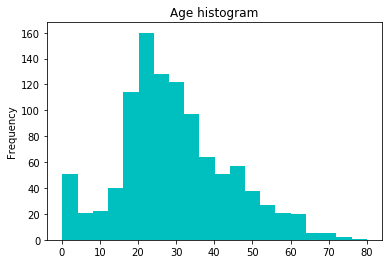

In [25]:
# Specify bins 
combined_df.Age.plot(kind='hist', title='Age histogram', color='c', bins=20);

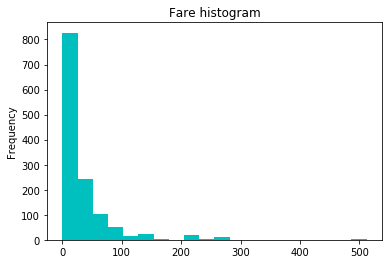

In [26]:
# Fare
combined_df.Fare.plot(kind='hist', title='Fare histogram', color='c', bins=20);

In [27]:
print("skewedness for Age {0:.2f}".format(combined_df.Age.skew()))
print("skewedness for Fare {0:.2f}".format(combined_df.Fare.skew()))

skewedness for Age 0.41
skewedness for Fare 4.37


### KDE

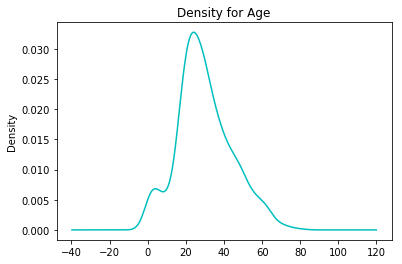

In [28]:
# Age
combined_df.Age.plot(kind='kde', title='Density for Age', color='c');

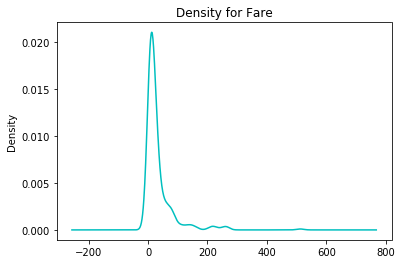

In [29]:
# Age
combined_df.Fare.plot(kind='kde', title='Density for Fare', color='c');

### Scatter plot for Bivariate data

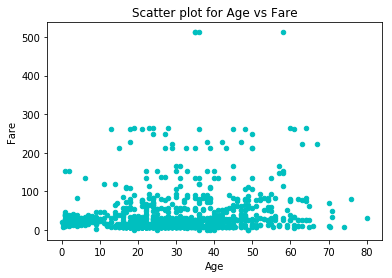

In [30]:
# Age and fare
combined_df.plot.scatter(x='Age', y='Fare', title='Scatter plot for Age vs Fare', color='c');

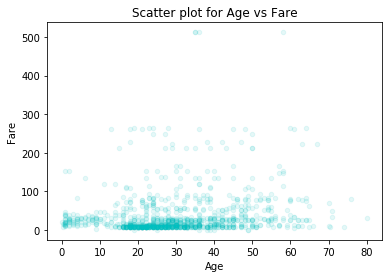

In [31]:
# Use alpha value to set transparency
combined_df.plot.scatter(x='Age', y='Fare', title='Scatter plot for Age vs Fare', color='c', alpha=0.1);

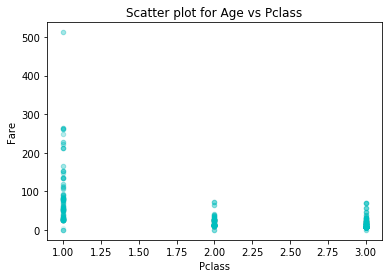

In [32]:
# Age and Pclass
combined_df.plot.scatter(x='Pclass', y='Fare', title='Scatter plot for Age vs Pclass', color='c', alpha=0.1);

### Grouping

In [33]:
# Group by sex and find age summary
combined_df.groupby('Sex').Age.describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,388.0,28.687088,14.576962,0.17,19.0,27.0,38.0,76.0
male,658.0,30.585228,14.280581,0.33,21.0,28.0,39.0,80.0


In [34]:
# Group by sex and find age summary
combined_df.groupby('Pclass').Fare.median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [35]:
# Group by sex and find age summary
combined_df.groupby(['Pclass', 'Sex'])['Age', 'Fare'].median()

Age      Fare
Pclass Sex                   
1      female  36.0  80.92915
       male    42.0  49.50420
2      female  28.0  23.00000
       male    29.5  13.00000
3      female  22.0  10.48960
       male    25.0   7.89580

In [36]:
# Group by sex and find age summary
combined_df.groupby(['Pclass']).agg({'Age':'mean', 'Fare':'median'})

,Age,Fare
Pclass,,
1,39.159930,60.0000
2,29.506705,15.0458
3,24.816367,8.0500


In [37]:
aggregations = {
    'Fare':{
        'mean_fare': 'mean',
        'median_fare': 'median',
        'mean_np': np.mean
    },
    'Age': {
        'range_Age': lambda x : max(x) - min(x),
        'max_age': max
    }
}

In [38]:
combined_df.groupby('Pclass').agg(aggregations)

/Users/sammykariuki/Desktop/DataScience/titanic_venv/lib/python3.7/site-packages/pandas/core/groupby/groupby.py:4656: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


Fare                              Age        
        mean_fare median_fare    mean_np range_Age max_age
Pclass                                                    
1       87.508992     60.0000  87.508992     79.08    80.0
2       21.179196     15.0458  21.179196     69.33    70.0
3       13.302889      8.0500  13.302889     73.83    74.0

### Crosstab

In [39]:
pd.crosstab(combined_df.Sex, combined_df.Pclass)

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


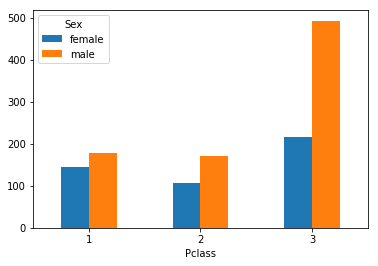

In [40]:
pd.crosstab(combined_df.Pclass, combined_df.Sex).plot(kind='bar', rot=0);

### Pivotal tables

In [41]:
combined_df.pivot_table(index='Pclass', columns='Sex', values='Age', aggfunc='mean')

Sex,female,male
Pclass,,
1,37.037594,41.029272
2,27.499223,30.815380
3,22.185329,25.962264


In [42]:
combined_df.groupby(['Pclass', 'Sex']).Age.mean()

Pclass  Sex   
1       female    37.037594
        male      41.029272
2       female    27.499223
        male      30.815380
3       female    22.185329
        male      25.962264
Name: Age, dtype: float64

In [43]:
# put result in tab format
combined_df.groupby(['Pclass', 'Sex']).Age.mean().unstack()

Sex,female,male
Pclass,,
1,37.037594,41.029272
2,27.499223,30.815380
3,22.185329,25.962264


### Data munging

In [44]:
# Check for missing values
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


In [45]:
# Embarked has two missing values
combined_df[combined_df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [46]:
# Embarkment of people at different points
combined_df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [47]:
# which embarked point has higher survival rate
pd.crosstab(combined_df[combined_df.Survived != -1000].Survived, combined_df[combined_df.Survived != -1000].Embarked)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [48]:
# Option two check fare relationship
combined_df.groupby(['Pclass', 'Embarked']).Fare.median().unstack()

Embarked,C,Q,S
Pclass,,,
1,76.7292,90.00,52.000
2,15.3146,12.35,15.375
3,7.8958,7.75,8.050


In [49]:
# fill the missing Embarked 
combined_df.Embarked.fillna('C', inplace=True)

In [50]:
# comfirm no missing value
combined_df[combined_df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [51]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


##### Fare missing value

In [52]:
# check row with missing fare
combined_df[combined_df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-1000,3701


In [53]:
# check median fare for Pclass 3 and embarked S
median_fare = combined_df.loc[(combined_df.Pclass == 3) & (combined_df.Embarked == 'S'), 'Fare'].median()
median_fare
combined_df.Fare.fillna(median_fare, inplace=True)

In [54]:
# replace missing value
combined_df.Fare.fillna(median_fare, inplace=True)

In [55]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 162.7+ KB


#### Age

In [56]:
# Set maximum rows to display
pd.options.display.max_rows = 10

In [57]:
combined_df[combined_df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959
...,...,...,...,...,...,...,...,...,...,...,...
1300,NaN,NaN,Q,7.7208,"Riordan, Miss. Johanna Hannah""""",0,3,female,0,-1000,334915
1302,NaN,NaN,Q,7.7500,"Naughton, Miss. Hannah",0,3,female,0,-1000,365237
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,-1000,A.5. 3236


count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64


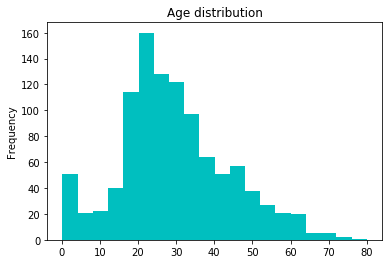

In [58]:
# check age dist
print(combined_df.Age.describe())
combined_df.Age.plot(kind='hist', color='c', bins=20, title='Age distribution');

In [59]:
# Explore median
# Group by gender
combined_df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

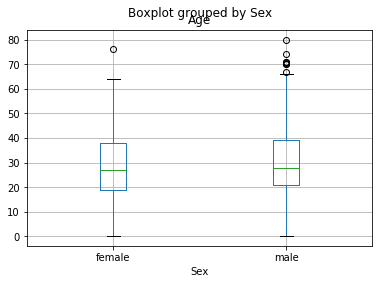

In [60]:
# Visualize boxplot
combined_df[combined_df.Age.notnull()].boxplot('Age', 'Sex')

In [61]:
age_sex_median = combined_df.groupby('Sex').Age.transform('median')
# combined_df.Age.fillna(age_sex_median, inplace=True) # if were to replace by gender median

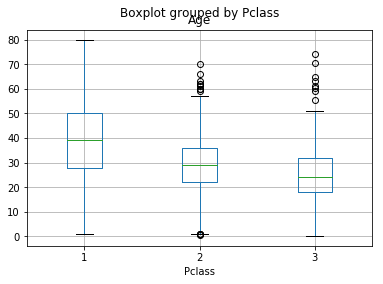

In [62]:
# Median by Pclass
combined_df[combined_df.Age.notnull()].boxplot('Age', 'Pclass');

In [63]:
# replace
age_pclass_median = combined_df.groupby('Pclass').Age.transform('median')
# combined_df.Age.fillna(age_pclass_median, inplace=True) # if were to replace by pclass median

In [64]:
# Age and title of a person
combined_df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [65]:
# Define a function to extract the title of a person from their name
def get_title(name):
    first_name_with_title =  name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [66]:
# use map function to apply the function to all rows
combined_df.Name.map(lambda x : get_title(x)) # alternatively use combined_df.Name.map(get_title)

PassengerId
1           mr
2          mrs
3         miss
4          mrs
5           mr
         ...  
1305        mr
1306      dona
1307        mr
1308        mr
1309    master
Name: Name, Length: 1309, dtype: object

In [67]:
combined_df.Name.map(lambda x : get_title(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [68]:
def get_clean_title(name):
    title_group = {
        'mr': 'Mr',
        'mrs': 'Mrs',
        'miss': 'Miss',
        'master': 'Master',
        'don': 'Sir',
        'rev': 'Sir',
        'dr': 'Officer',
        'mme': 'Mrs',
        'ms': 'Mrs',
        'major': 'Officer',
        'lady': 'Lady',
        'sir': 'Sir',
        'mlle': 'Miss',
        'col': 'Officer',
        'capt': 'Officer',
        'the countess': 'Lady',
        'jonkheer': 'Sir',
        'dona': 'Lady'
    }
    title = get_title(name)
    return title_group[title]

In [69]:
combined_df['Title'] = combined_df.Name.map(lambda x : get_clean_title(x))

In [70]:
combined_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,Mr


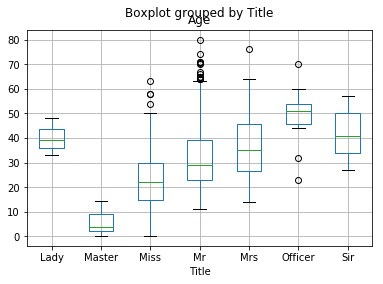

In [71]:
# Boxplot for age with title
combined_df[combined_df.Age.notnull()].boxplot('Age', 'Title');

In [72]:
# replace missing age
age_title_median = combined_df.groupby('Title').Age.transform('median')
combined_df.Age.fillna(age_title_median, inplace=True)

In [73]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 172.9+ KB


#### Outliers

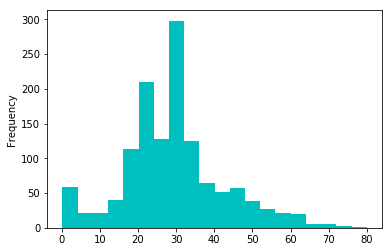

In [74]:
# Age
combined_df.Age.plot(kind='hist', color='C', bins=20);

In [75]:
combined_df[combined_df.Age > 70]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
97,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,1,male,0,0,PC 17754,Mr
117,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,3,male,0,0,370369,Mr
494,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,1,male,0,0,PC 17609,Mr
631,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1,27042,Mr
852,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,3,male,0,0,347060,Mr
988,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,1,female,1,-1000,19877,Mrs


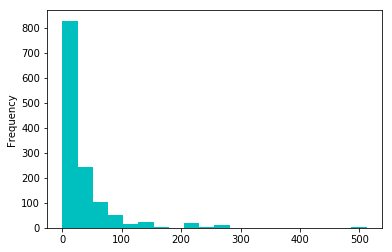

In [76]:
# Fare 
combined_df.Fare.plot(kind='hist', color='C', bins=20);

In [77]:
combined_df.loc[combined_df.Fare == combined_df.Fare.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,Miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,Mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,Mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-1000,PC 17755,Mrs


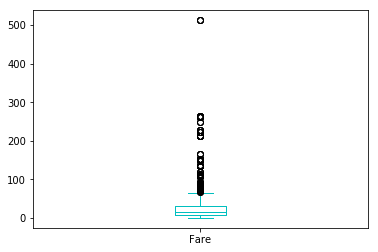

In [78]:
combined_df.Fare.plot(kind='box', color='c');

In [79]:
logFare = np.log(combined_df.Fare + 1.0)

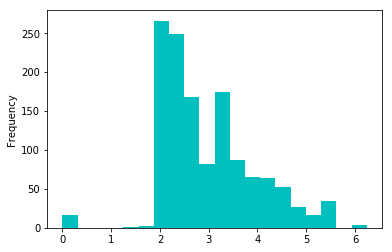

In [80]:
logFare.plot(kind='hist', bins=20, color='c');

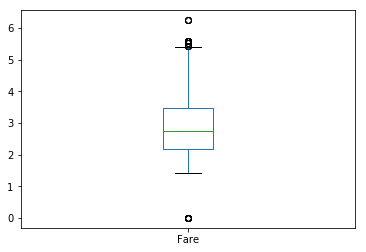

In [81]:
logFare.plot(kind='box');

In [82]:
# binning
pd.qcut(combined_df.Fare, 4)

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
              ...        
1305      (7.896, 14.454]
1306    (31.275, 512.329]
1307      (-0.001, 7.896]
1308      (7.896, 14.454]
1309     (14.454, 31.275]
Name: Fare, Length: 1309, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [83]:
# Add labels to binning
pd.qcut(combined_df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high']) # discretization

PassengerId
1        very_low
2       very_high
3             low
4       very_high
5             low
          ...    
1305          low
1306    very_high
1307     very_low
1308          low
1309         high
Name: Fare, Length: 1309, dtype: category
Categories (4, object): [very_low < low < high < very_high]

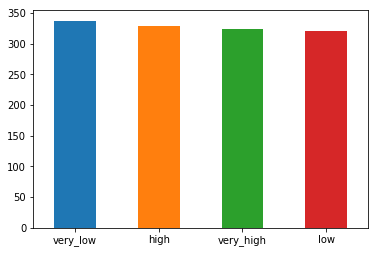

In [84]:
# plot
pd.qcut(combined_df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high']).value_counts().plot(kind='bar', rot=0);

In [85]:
# Create a fare bin feature
combined_df['Fare_Bin'] = pd.qcut(combined_df.Fare, 4, labels=['very_low', 'low', 'high', 'very_high'])

## Feature Engineering

#### Age state (Adult or child)

In [86]:
combined_df['AgeState'] = np.where(combined_df.Age >= 18, 'Adult', 'Child')
combined_df.sample(n=5)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,AgeState
PassengerId,,,,,,,,,,,,,,
973,67.0,C55 C57,S,221.7792,"Straus, Mr. Isidor",0,1,male,1,-1000,PC 17483,Mr,very_high,Adult
326,36.0,C32,C,135.6333,"Young, Miss. Marie Grice",0,1,female,0,1,PC 17760,Miss,very_high,Adult
613,22.0,NaN,Q,15.5000,"Murphy, Miss. Margaret Jane",0,3,female,1,1,367230,Miss,high,Adult
1131,48.0,C86,C,106.4250,"Douglas, Mrs. Walter Donald (Mahala Dutton)",0,1,female,1,-1000,PC 17761,Mrs,very_high,Adult
1245,49.0,NaN,S,65.0000,"Herman, Mr. Samuel",2,2,male,1,-1000,220845,Mr,very_high,Adult


In [87]:
# Agestate count
combined_df.AgeState.value_counts()

Adult    1147
Child     162
Name: AgeState, dtype: int64

In [88]:
# crosstab
pd.crosstab(combined_df[combined_df.Survived != -1000].AgeState, combined_df[combined_df.Survived != -1000].Survived)

Survived,0,1
AgeState,,
Adult,495,279
Child,54,63


#### Family size feature

In [89]:
combined_df['FamilySize'] = combined_df.Parch + combined_df.SibSp + 1 # 1 for self

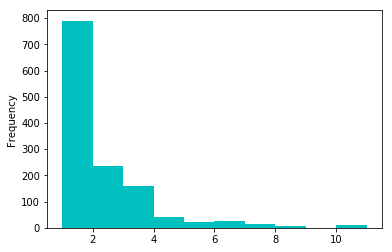

In [90]:
combined_df.FamilySize.plot(kind='hist', color='c');

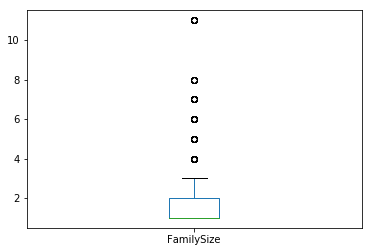

In [91]:
combined_df.FamilySize.plot(kind='box');

In [92]:
pd.options.display.max_rows = 15
combined_df.loc[combined_df.FamilySize == combined_df.FamilySize.max(),
                ['Name', 'Survived', 'FamilySize']] # all did not survive

,Name,Survived,FamilySize
PassengerId,,,
160,"Sage, Master. Thomas Henry",0,11
181,"Sage, Miss. Constance Gladys",0,11
202,"Sage, Mr. Frederick",0,11
325,"Sage, Mr. George John Jr",0,11
793,"Sage, Miss. Stella Anna",0,11
847,"Sage, Mr. Douglas Bullen",0,11
864,"Sage, Miss. Dorothy Edith ""Dolly""",0,11
1080,"Sage, Miss. Ada",-1000,11
1234,"Sage, Mr. John George",-1000,11


In [93]:
# crosstab
pd.crosstab(combined_df[combined_df.Survived != -1000].Survived,
            combined_df[combined_df.Survived != -1000].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


#### IsMother feature

In [94]:
combined_df['IsMother'] = np.where(((combined_df.Sex == 'female') & 
                                   (combined_df.Age >= 18) &
                                    (combined_df.Parch > 0) &
                                   (combined_df.Title != 'Miss')), 1, 0)

In [95]:
# crosstab
pd.crosstab(combined_df[combined_df.Survived != -1000].Survived,
            combined_df[combined_df.Survived != -1000].IsMother)

IsMother,0,1
Survived,,
0,533,16
1,302,40


### Deck Feature

In [96]:
combined_df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [97]:
# Cabin T is unique as it does not follow the normal naming
combined_df.loc[combined_df.Cabin == 'T',]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,AgeState,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,,
340,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,1,male,0,0,113784,Mr,very_high,Adult,1,0


In [98]:
# Assuming this was a mistake set to none
combined_df.loc[combined_df.Cabin == 'T', 'Cabin'] =  np.nan

In [99]:
combined_df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [100]:
# Extract the first character od cabin string to deck
def get_deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(), 'Z')

combined_df['Deck'] = combined_df['Cabin'].map(lambda x : get_deck(x))

In [101]:
# get passagrs per Deck
combined_df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [102]:
# crosstab
pd.crosstab(combined_df[combined_df.Survived != -1000].Survived,
            combined_df[combined_df.Survived != -1000].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [103]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
Age           1309 non-null float64
Cabin         294 non-null object
Embarked      1309 non-null object
Fare          1309 non-null float64
Name          1309 non-null object
Parch         1309 non-null int64
Pclass        1309 non-null int64
Sex           1309 non-null object
SibSp         1309 non-null int64
Survived      1309 non-null int64
Ticket        1309 non-null object
Title         1309 non-null object
Fare_Bin      1309 non-null category
AgeState      1309 non-null object
FamilySize    1309 non-null int64
IsMother      1309 non-null int64
Deck          1309 non-null object
dtypes: category(1), float64(2), int64(6), object(8)
memory usage: 215.3+ KB


### Categorical feature encoding
- Binary encoding - for two categories .  
- Label encoding - multiple categories(e.g low, high, very high) .   
- One-hot-encoding - Create as many features as number of categories(e.g A,B,C and D) . 

In [104]:
combined_df['IsMale'] = np.where(combined_df.Sex == 'male', 1, 0)

In [105]:
# column Deck, Pclass, Title, AgeState, Fare_Bin, Embarked
df = pd.get_dummies(combined_df, columns=['Deck', 'Pclass', 'Title', 'AgeState', 'Fare_Bin', 'Embarked'])

### Drop and reorder columns

In [106]:
df.drop(['Cabin', 'Name', 'Ticket', 'Parch', 'SibSp', 'Sex'], axis=1, inplace=True)

In [107]:
# Reorder columns
columns = [column for column in df.columns if column != 'Survived']
columns = ['Survived'] + columns
df = df[columns]

### Save processed dataframe into a file

In [108]:
processed_data_path = os.path.join(os.path.pardir, 'data', 'processed')
write_train_file_path = os.path.join(processed_data_path, 'train.csv')
write_test_file_path = os.path.join(processed_data_path, 'test.csv')

In [109]:
# train data
df.loc[df.Survived != -1000].to_csv(write_train_file_path)
# test data
columns = [column for column in df.columns if column != 'Survived'] # exclude survived column
df.loc[df.Survived == -1000, columns].to_csv(write_test_file_path)

## Building reproducible scripts

In [110]:
get_processd_data_script_file = os.path.join(os.path.pardir, 'src', 'data', 'get_processed_data.py')

In [111]:
%%writefile $get_processd_data_script_file

import os
import pandas as pd
import numpy as np

def read_data():
    # Define raw data path
    raw_data_path = os.path.join('data', 'raw')
    train_file_path = os.path.join(raw_data_path, 'train.csv')
    test_file_path = os.path.join(raw_data_path, 'test.csv')
    # read data from cvs file
    train_df = pd.read_csv(train_file_path, index_col='PassengerId')
    test_df = pd.read_csv(test_file_path, index_col='PassengerId')
    test_df['Survived'] = -1000  # set a default value for survived column on test data
    combined_df = pd.concat((train_df, test_df), axis=0, sort=True)
    return combined_df

def processed_data(df):
    # use method chaining concept
    return (df
            # Create title attribute
            .assign(Title = lambda x : x.Name.map(get_clean_title))
            # working missing values
            .pipe(fill_missing_values)
            # Create Fare bin feature
            .assign(Fare_Bin = lambda x: pd.qcut(x.Fare, 4, labels=['very_low', 'low', 'high', 'very_high']))
            # Create Age state feature
            .assign(AgeState = lambda x : np.where(x.Age >= 18, 'Adult', 'Child'))
            .assign(FamilySize = lambda x : x.Parch + x.SibSp + 1)
            .assign(IsMother = lambda x :np.where(((x.Sex == 'female') & 
                                   (x.Age >= 18) & (x.Parch > 0) &(x.Title != 'Miss')), 1, 0))
            # Create Deck feature
            .assign(Cabin = lambda x: np.where(x.Cabin == 'T', np.nan, x.Cabin))
            .assign(Deck = lambda x : x.Cabin.map(get_deck))
            # features encoding
            .assign(IsMale = lambda x : np.where(x.Sex == 'male', 1, 0))
            .pipe(pd.get_dummies, columns=['Deck', 'Pclass', 'Title', 'AgeState', 'Fare_Bin', 'Embarked'])
            # Drop unnecessary column
            .drop(['Cabin', 'Name', 'Ticket', 'Parch', 'SibSp', 'Sex'], axis=1)
            # Reorder column
            .pipe(reorder_columns)
           )

# Define a function to extract the title of a person from their name
def get_title(name):
    first_name_with_title =  name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

def get_clean_title(name):
    title_group = {
        'mr': 'Mr',
        'mrs': 'Mrs',
        'miss': 'Miss',
        'master': 'Master',
        'don': 'Sir',
        'rev': 'Sir',
        'dr': 'Officer',
        'mme': 'Mrs',
        'ms': 'Mrs',
        'major': 'Officer',
        'lady': 'Lady',
        'sir': 'Sir',
        'mlle': 'Miss',
        'col': 'Officer',
        'capt': 'Officer',
        'the countess': 'Lady',
        'jonkheer': 'Sir',
        'dona': 'Lady'
    }
    title = get_title(name)
    return title_group[title]

def fill_missing_values(df):
    # Embarked
    df.Embarked.fillna('C', inplace=True)
    # Fare
    median_fare = df.loc[
        (df.Pclass == 3) & (df.Embarked == 'S'), 'Fare'].median()
    df.Fare.fillna(median_fare, inplace=True)
    # Age
    age_title_median = df.groupby('Title').Age.transform('median')
    df.Age.fillna(age_title_median, inplace=True)
    return df

def get_deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(), 'Z')

def reorder_columns(df):
    # Reorder columns
    columns = [column for column in df.columns if column != 'Survived']
    columns = ['Survived'] + columns
    df = df[columns]
    return df

def write_data_to_csv(df):
    processed_data_path = os.path.join('data', 'processed')
    write_train_file_path = os.path.join(processed_data_path, 'train.csv')
    write_test_file_path = os.path.join(processed_data_path, 'test.csv')
    # train data
    df.loc[df.Survived != -1000].to_csv(write_train_file_path)
    # test data
    columns = [column for column in df.columns if column != 'Survived'] # exclude survived column
    df.loc[df.Survived == -1000, columns].to_csv(write_test_file_path)
        

Overwriting ../src/data/get_processed_data.py
